## Dividir los mejores casos en su propio directorio

In [13]:
import os
import sys
import json
import shutil

from natsort import natsorted

# Filepath of the JSON file containing the dictionary
file_path = "your_file.json"  # Replace with the path to your JSON file
folder_path = "./multiple_final_samples/"

for sample_folder in natsorted(os.listdir(folder_path)):
    print(sample_folder)
    
    # Open the JSON file for reading
    with open(os.path.join(folder_path,sample_folder,"ranking.json"), "r") as file:
        loaded_dict = json.load(file)
        source_dir = loaded_dict[0]["case"]
        print(source_dir)

        # Destination directory with a new name
        destination_dir = os.path.join("./best_cases",source_dir[2:])  # Replace with the path to your destination directory
        print(destination_dir)


        # Copy the directory and its contents
        shutil.copytree(source_dir, destination_dir)

sample_0
./multiple_final_samples/sample_0/case_4
./best_cases/multiple_final_samples/sample_0/case_4
sample_1
./multiple_final_samples/sample_1/case_0
./best_cases/multiple_final_samples/sample_1/case_0
sample_2
./multiple_final_samples/sample_2/case_1
./best_cases/multiple_final_samples/sample_2/case_1
sample_3
./multiple_final_samples/sample_3/case_2
./best_cases/multiple_final_samples/sample_3/case_2
sample_4
./multiple_final_samples/sample_4/case_3
./best_cases/multiple_final_samples/sample_4/case_3
sample_5
./multiple_final_samples/sample_5/case_4
./best_cases/multiple_final_samples/sample_5/case_4
sample_6
./multiple_final_samples/sample_6/case_1
./best_cases/multiple_final_samples/sample_6/case_1
sample_7
./multiple_final_samples/sample_7/case_0
./best_cases/multiple_final_samples/sample_7/case_0
sample_8
./multiple_final_samples/sample_8/case_4
./best_cases/multiple_final_samples/sample_8/case_4
sample_9
./multiple_final_samples/sample_9/case_4
./best_cases/multiple_final_samp

## Calcular el MSE import cv2


In [140]:
import cv2
import numpy as np
from natsort import natsorted
from skimage import io
from skimage.metrics import structural_similarity as ssim

reals_path = "../../../Datasets/Embryo/EmbryoF1_20frames_128/"
fakes_path = "./final_samples_default_long/"

total_MSE = 0
total_SSIM = 0
total_PSNR = 0
total_cases = 0

for f1, f2 in zip(natsorted(os.listdir(reals_path))[635:], natsorted(os.listdir(fakes_path))):
    list_dir = [item for item in os.listdir(os.path.join(reals_path,f1)) if item != ".ipynb_checkpoints"]
    list_dir2 = [item for item in os.listdir(os.path.join(fakes_path,f2,"embryo_overview_img")) if item != ".ipynb_checkpoints"]
    
    case_MSE = 0
    case_SSIM = 0
    case_PSNR = 0
    total_images = 0
    
    video_list = natsorted(list_dir2)
    step = len(video_list) // 15

    # Use a list comprehension to extract 15 equally distributed elements
    equally_distributed_list = [video_list[int(i * step)] for i in range(15)]
    
    for img1, img2 in zip(natsorted(list_dir[:15]), equally_distributed_list):
        
        img1_path = os.path.join(reals_path, f1, img1)
        img2_path = os.path.join(fakes_path, f2,"embryo_overview_img", img2)
        
        # Load the two images you want to compare
        image1 = cv2.imread(img1_path)  # Replace with the path to your first image
        image2 = cv2.imread(img2_path)  # Replace with the path to your second image

        # Check if the images have the same dimensions
        if image1.shape == image2.shape:
            # Calculate the squared difference between the two images
            squared_diff = np.square(image1 - image2)

            
            
            # Calculate the MSE
            mse = np.mean(squared_diff)
            case_MSE += mse
            
            image1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
            image2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

            
            
            # Calculate the SSIM
            ssim_score = ssim(image1_gray, image2_gray)
            case_SSIM += ssim_score
            
            
            
            
            # Calculate the Mean Squared Error (MSE) between the two images
            mse = np.mean((image1 - image2) ** 2)

            # Maximum pixel value (8-bit image)
            max_pixel_value = 255

            # Calculate the PSNR
            psnr = 10 * np.log10((max_pixel_value ** 2) / mse)
            case_PSNR += psnr
            
        else:
            print("The images have different dimensions and cannot be compared.")
        
        total_images += 1
        
    total_cases += 1
    total_MSE += case_MSE/total_images
    total_SSIM += case_SSIM/total_images
    total_PSNR += case_PSNR/total_images
        
print(f"Total cases: {total_cases}")
print(f"Total MSE: {total_MSE/total_cases}")
print(f"Total SSIM: {total_SSIM/total_cases}")
print(f"Total PSNR: {total_PSNR/total_cases}")





Total cases: 69
Total MSE: 97.85683723486565
Total SSIM: 0.14450127433066434
Total PSNR: 28.239470652462856


In [68]:
import cv2
import numpy as np
from natsort import natsorted
from skimage import io
from skimage.metrics import structural_similarity as ssim

reals_path = "../../../Datasets/Embryo/EmbryoF1_20frames_128/"
# fakes_path = "./vanilla_final_samples/"
fakes_path = "./best_cases/multiple_final_samples/"

total_MSE = 0
total_SSIM = 0
total_PSNR = 0
total_cases = 0

for f1, f2 in zip(natsorted(os.listdir(reals_path))[635:], natsorted(os.listdir(fakes_path))):
    list_dir = [item for item in os.listdir(os.path.join(reals_path,f1)) if item != ".ipynb_checkpoints"]
    case_path = os.path.join(fakes_path,f2)
    list_dir2 = [item for item in os.listdir(os.path.join(fakes_path,f2,os.listdir(case_path)[0],"embryo_overview_img")) if item != ".ipynb_checkpoints"]
    case_MSE = 0
    case_SSIM = 0
    case_PSNR = 0
    total_images = 0
    
    for img1, img2 in zip(natsorted(list_dir[:15]), natsorted(list_dir2)):
        
        img1_path = os.path.join(reals_path, f1, img1)
        img2_path = os.path.join(fakes_path, f2, os.listdir(case_path)[0],"embryo_overview_img", img2)
        
        # Load the two images you want to compare
        image1 = cv2.imread(img1_path)  # Replace with the path to your first image
        image2 = cv2.imread(img2_path)  # Replace with the path to your second image

        # Check if the images have the same dimensions
        if image1.shape == image2.shape:
            # Calculate the squared difference between the two images
            squared_diff = np.square(image1 - image2)

            
            
            # Calculate the MSE
            mse = np.mean(squared_diff)
            case_MSE += mse
            
            image1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
            image2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

            
            
            # Calculate the SSIM
            ssim_score = ssim(image1_gray, image2_gray)
            case_SSIM += ssim_score
            
            
            
            
            # Calculate the Mean Squared Error (MSE) between the two images
            mse = np.mean((image1 - image2) ** 2)

            # Maximum pixel value (8-bit image)
            max_pixel_value = 255

            # Calculate the PSNR
            psnr = 10 * np.log10((max_pixel_value ** 2) / mse)
            case_PSNR += psnr
            
        else:
            print("The images have different dimensions and cannot be compared.")
        
        total_images += 1
        
    total_cases += 1
    total_MSE += case_MSE/total_images
    total_SSIM += case_SSIM/total_images
    total_PSNR += case_PSNR/total_images
        
print(f"Total cases: {total_cases}")
print(f"Total MSE: {total_MSE/total_cases}")
print(f"Total SSIM: {total_SSIM/total_cases}")
print(f"Total PSNR: {total_PSNR/total_cases}")





Total cases: 69
Total MSE: 97.46162209625979
Total SSIM: 0.38772947873069497
Total PSNR: 28.632329225354088


## Classification MSE

In [137]:

from sklearn.metrics import mean_squared_error

# Read the classification results from the real video file
with open("class_models_and_distributions/embryo_128_17.txt", "r") as real_file:
    real_lines = real_file.readlines()[635:]

# Read the classification results from the fake video file
with open("class_models_and_distributions/long_generation_class.txt", "r") as fake_file:
    fake_lines = fake_file.readlines()
    
# Assuming that each line contains tab-separated classification results
real_results_str = [line.strip().split("\t") for line in real_lines]
fake_results_str = [line.strip().split("\t") for line in fake_lines]

real_results = [np.float64(item) for item in real_results_str]
fake_results = [np.float64(item) for item in fake_results_str]

# Ensure both lists have the same length
if len(real_results) != len(fake_results):
    print("The two files have different numbers of frames.")
    exit()

# Initialize a list to store MSE values for each frame
mse_values = []

mse_per_frame = [0]*15
for real_frame_list, fake_frame_list in zip(real_results, fake_results):
    # Assuming that both frames have the same number of classification results
    frame = 0
    for real_frame, fake_frame in zip(real_frame_list,fake_frame_list):
        # Calculate the squared difference between the two images
        squared_diff = np.square(real_frame - fake_frame)

        # Calculate the MSE
        frame_mse = np.mean(squared_diff)
        mse_per_frame[frame] =  mse_per_frame[frame]+frame_mse
        frame += 1
    
    mse = mean_squared_error(real_frame_list, fake_frame_list)
    mse_values.append(mse)
    
overall_mse = sum(mse_values) / len(mse_values)
overall_mse_per_frame = [x / len(mse_values) for x in mse_per_frame]
print(f"overall_mse_per_frame {overall_mse_per_frame}")
print(f"Mean Squared Error (MSE) between the videos: {overall_mse:.4f}")

overall_mse_per_frame [11.53623188405797, 153.42028985507247, 152.71014492753622, 125.43478260869566, 106.5072463768116, 94.01449275362319, 49.91304347826087, 41.30434782608695, 35.289855072463766, 22.536231884057973, 18.159420289855074, 15.043478260869565, 8.72463768115942, 9.231884057971014, 45.73913043478261]
Mean Squared Error (MSE) between the videos: 59.3043


## Confussion matrix

Confusion Matrix:
[[33 20  3  6  0  1  0  0  0  0  0  0  0  0  0  0]
 [12 73  5 32  1 11  5  1  0  7  0  3  0  1  4  0]
 [ 7  5  3  2  1  3  0  1  0  1  0  0  0  0  1  0]
 [ 0 24  3 24  2 13  5  6  1  8  6  1  1  0  1  0]
 [ 0  1  0  3  2  3  0  1  0  1  0  0  0  0  0  0]
 [ 1  7  1 22  0 20  9  5  1 20  6  5  0  1  0  1]
 [ 0  0  1  2  0  3  3  0  1  6  5  2  1  1  2  0]
 [ 0  0  0  2  2  3  1  1  0  4  6  0  0  0  1  0]
 [ 0  0  0  2  1  4  5  1  1  6  5  1  2  0  3  2]
 [ 1  1  1  6  1 13  6  0  6 15 20  5  2  0  7  8]
 [ 0  0  0  1  0 18  4  1  7 33 56  8  4  1  2  9]
 [ 0  1  0  2  0  0  2  0  2  9 19  2  4  1  2  4]
 [ 0  0  0  0  0  1  1  0  1  4 21  1  5  0  5  4]
 [ 1  0  0  0  0  0  0  0  0  1 10  1  2  0  2  6]
 [ 0  0  1  2  0  2  1  2  2  7 16  6  7  2  2  3]
 [ 0  0  0  2  0  2  1  2  4  9 32  8 12  5 11 17]]


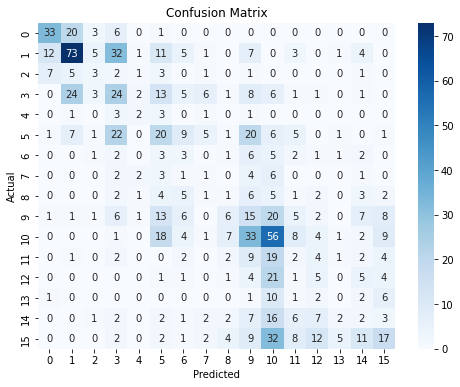

In [127]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Read the classification results from the real video file
with open("class_models_and_distributions/embryo_128_17.txt", "r") as real_file:
    real_lines = real_file.readlines()[635:]

# Read the classification results from the fake video file
with open("class_models_and_distributions/vanilla_class.txt", "r") as fake_file:
    fake_lines = fake_file.readlines()
    
# Assuming that each line contains tab-separated classification results
real_results_str = [line.strip().split("\t") for line in real_lines]
fake_results_str = [line.strip().split("\t") for line in fake_lines]

real_results = np.array([np.int16(item) for item in real_results_str]).ravel()
fake_results = np.array([np.int16(item) for item in fake_results_str]).ravel()

# Ensure both lists have the same length
if len(real_results) != len(fake_results):
    print("The two files have different numbers of frames.")
    exit()

# print(real_results)
# print()
# print(fake_results)
    
# print(classification_report(real_results, fake_results, digits=3))

confusion = np.array(confusion_matrix(real_results, fake_results))

print("Confusion Matrix:")
print(confusion)

class_names = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15']

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Order accuracy

In [136]:
import pandas as pd
import numpy as np 
import os

embryo_dict_OLD = {
    'tPB2'  : 0,
    'tPNa' : 1,
    'tPNf' : 2,
    't2'  : 3,
    't3'  : 4,
    't4'  : 5,
    't5'  : 6,
    't6'  : 7,
    't7'  : 8,
    't8'  : 9,
    't9+' : 10,
    'tM'  : 11,
    'tSB' : 12,
    'tB'  : 13,
    'tEB' : 14,
    'tHB' : 15,
    'empty' : 16,
}

embryo_dict = {
    0  : 0,
    1 : 1,
    2 : 2,
    3  : 3,
    4  : 4,
    5  : 5,
    6  : 6,
    7  : 7,
    8  : 8,
    9  : 9,
    10 : 10,
    11  : 11,
    12 : 12,
    13  : 13,
    14 : 14,
    15 : 15,
    16 : 16,
}


def load_distribution(path):
    return pd.read_csv(path, sep="\t", header=None)
      
def accuracy_calculation_embryo(distribution, fdm_deg):   
    total_seq = len(distribution.index)

    acc_sum = 0

    for index, row in distribution.iterrows():
        acc_row = 0
        
        for f in range(n_frames):
            
            
            f_class = (embryo_dict[row[f]] * 15)/16
            
            # print("Clase",row[f],"dict",embryo_dict[row[f]],"f_class",int(f_class))
            
            if(f_class >= f-fdm_deg and  f_class <= f+fdm_deg):
                acc_row = acc_row + 1
            else: 
                acc_row = acc_row + 0

        acc_sum = acc_sum + (acc_row/n_frames)

    acc_final = acc_sum / total_seq
    return acc_final    
    


def calculate_order_accuracy_embryo(distribution, fdm_deg):
    total_seq = len(distribution.index)
    acc_sum = 0
    for index, row in distribution.iterrows():
        acc_row = 0
        correct_pairs = 0
        total_pairs = len(row) - 1
        # print(row,"\n")
        
        for i in range(len(row) - 1):
            current = (embryo_dict[row[i]] * 15)/16
            after = (embryo_dict[row[i+1]] * 15)/16
            below = after - fdm_deg
            
            if (current <= after and current >= below):
                correct_pairs += 1
            #     print("current",row[i],"after",row[i + 1],"below", below, "CORRECT")
            # else: 
            #     print("current",row[i],"after",row[i + 1],"below", below, "INCORRECT")
            
        acc_row = (correct_pairs / total_pairs) * 100
        acc_sum = acc_sum + acc_row
        
    acc_final = acc_sum / total_seq   
    return acc_final / 100

n_frames = 15

dataset = "yeast" #apple  embryo yeast
img_size = 128
num_classes = 20
method = "bioloss"  # vanilla  bioloss

general_path = "./class_models_and_distributions/"
file_path = "vanilla_class.txt"

final_path = os.path.join(general_path, file_path)

distribution = load_distribution(final_path)       

for i in range(3):
    fdm_deg = i #freedom degrees
    print("Total accuracy with",fdm_deg,"freedom degrees is", accuracy_calculation_embryo(distribution,fdm_deg))
    
    # accuracy = calculate_order_accuracy_embryo(distribution, i+1)
    # print(f"The accuracy of the order in the list is {accuracy:.3f}")
    

Total accuracy with 0 freedom degrees is 0.04251207729468603
Total accuracy with 1 freedom degrees is 0.3497584541062801
Total accuracy with 2 freedom degrees is 0.6222222222222222


In [141]:
import numpy as np

# Assuming you have a list of positions X and their probabilities P(X | S) for a specific stage S
positions = [1, 2, 3, 4, 5]
probabilities = [0.1, 0.2, 0.4, 0.2, 0.1]

# Calculate the expected value
expected_position = np.dot(positions, probabilities)

print("Expected Position:", expected_position)

Expected Position: 5.0
